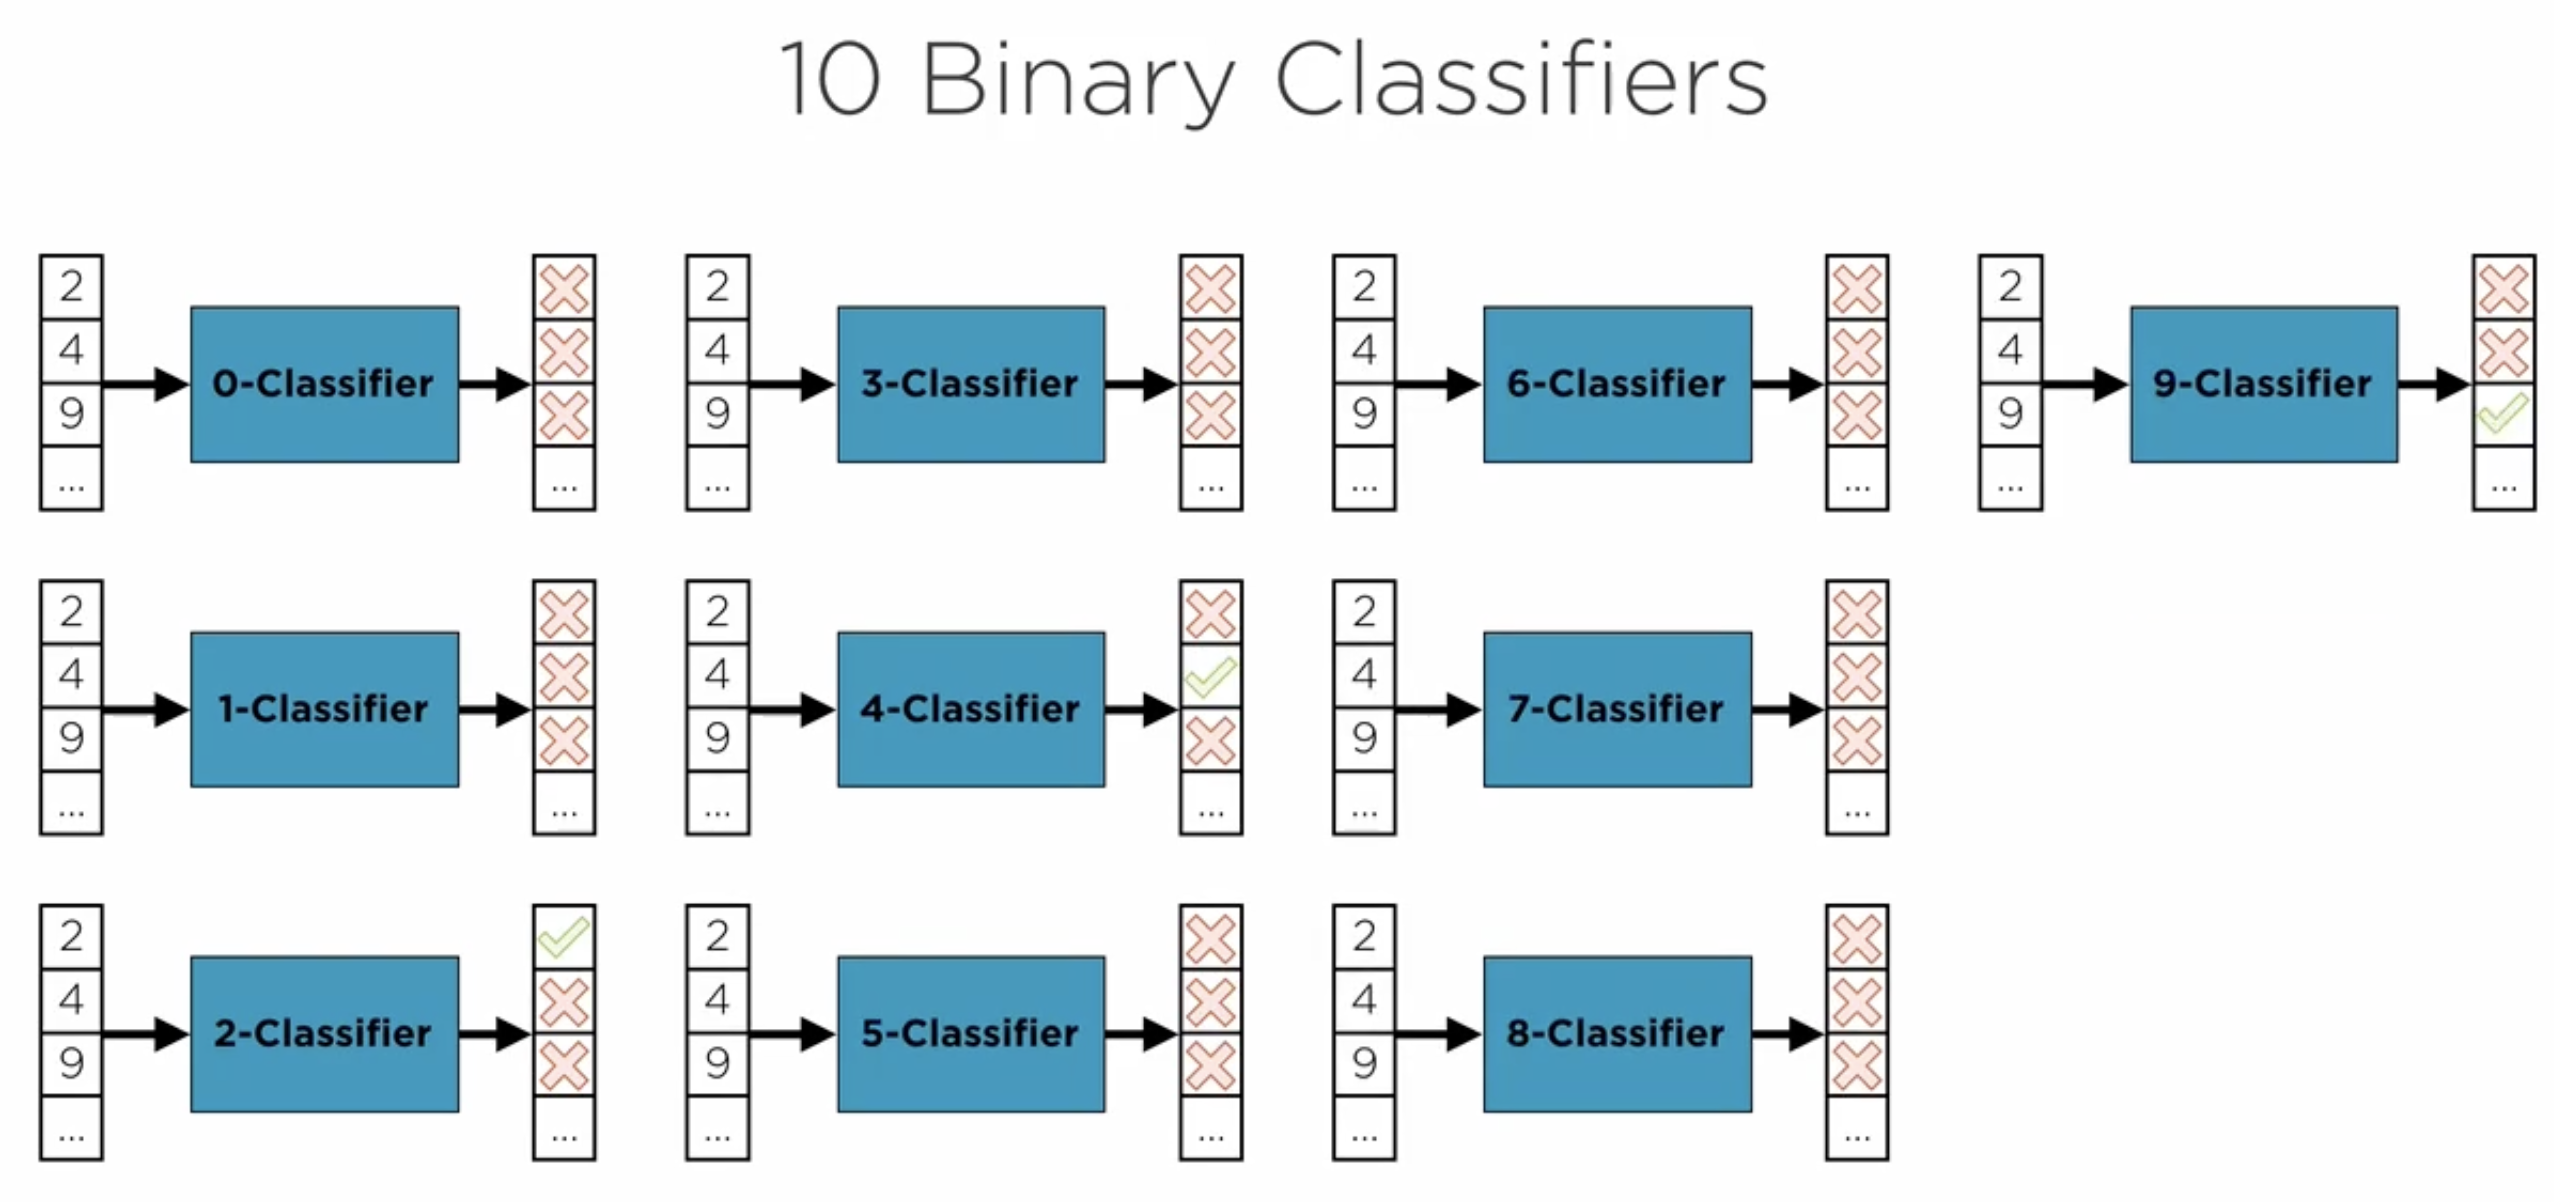

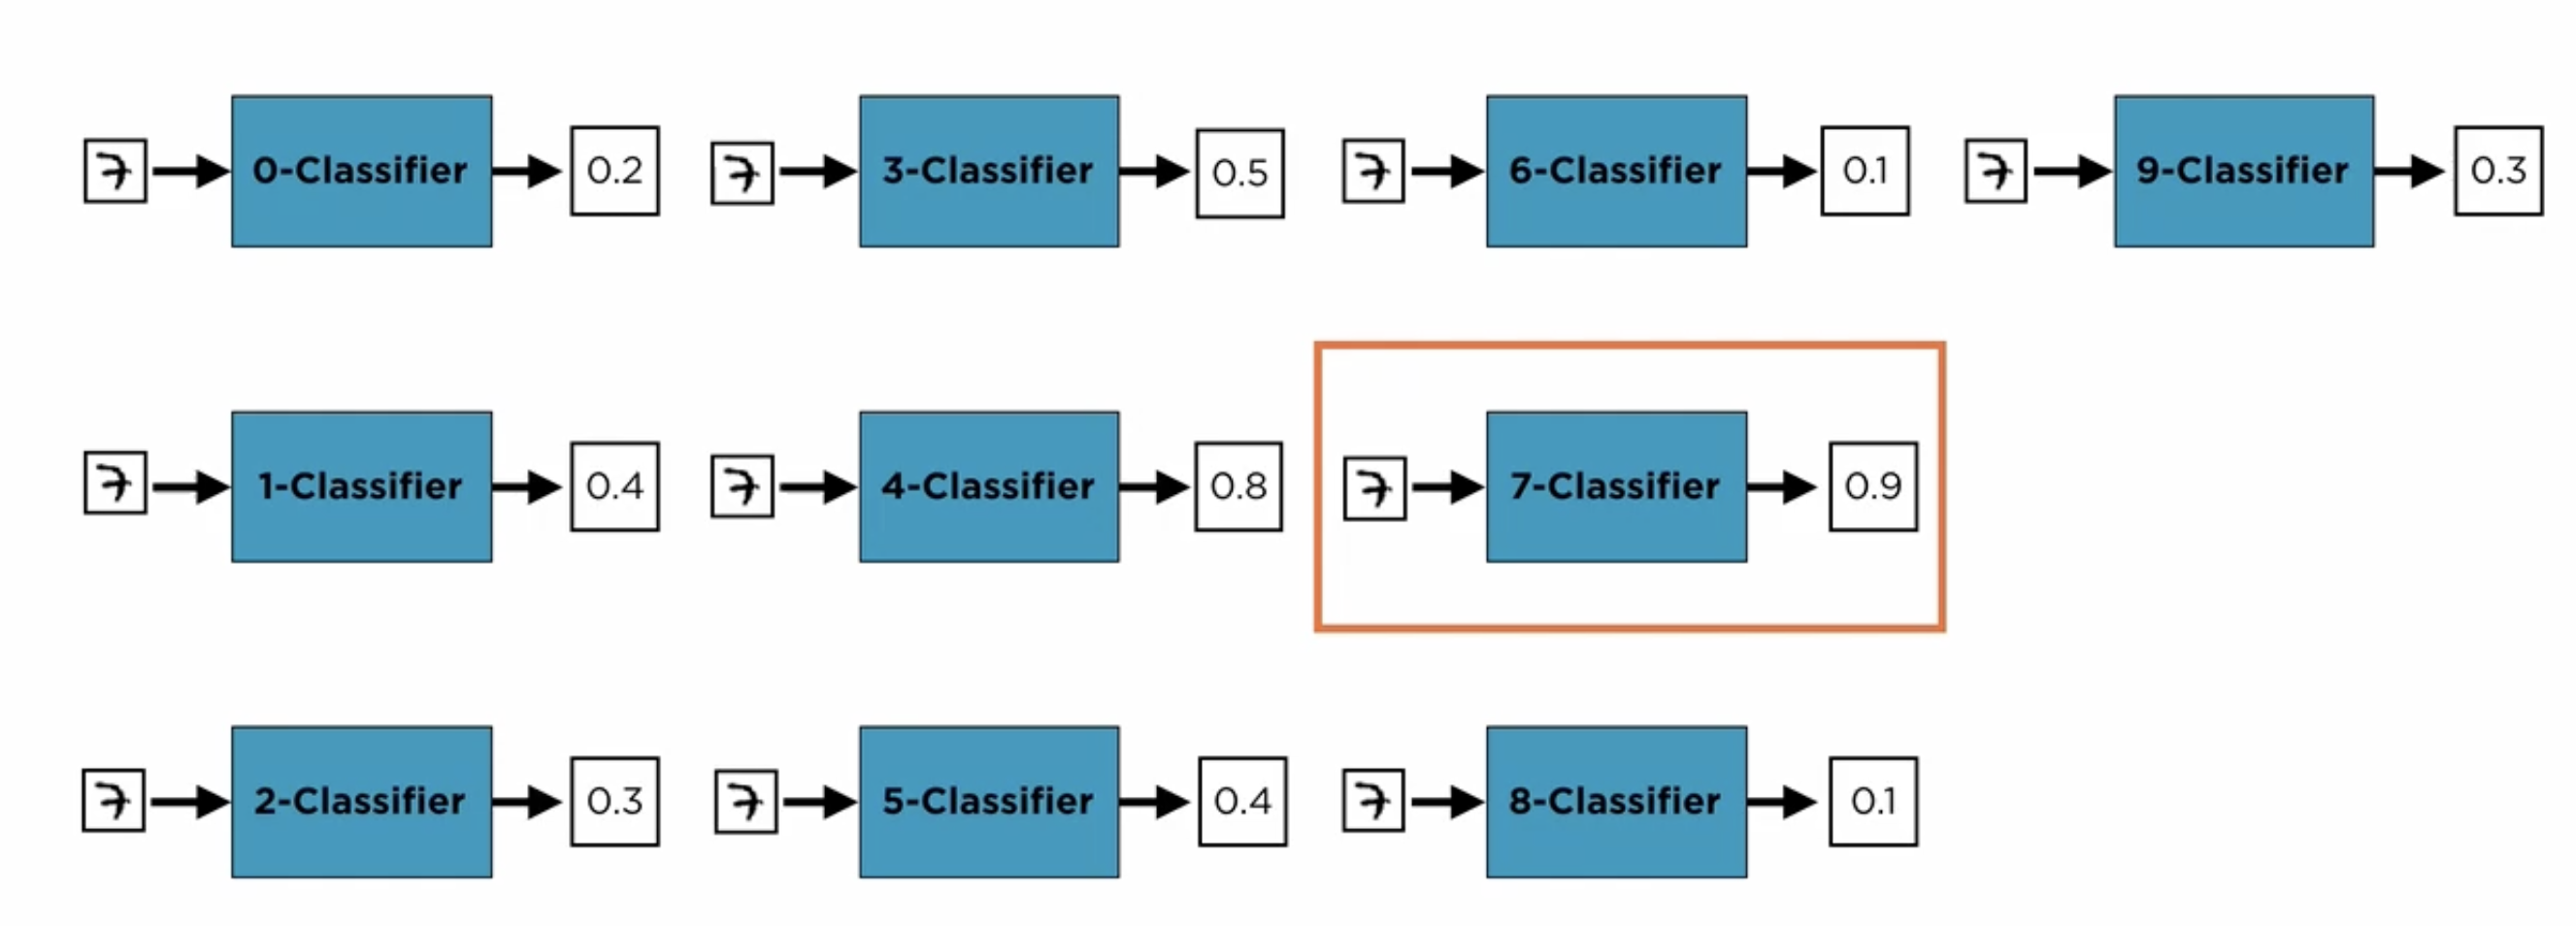

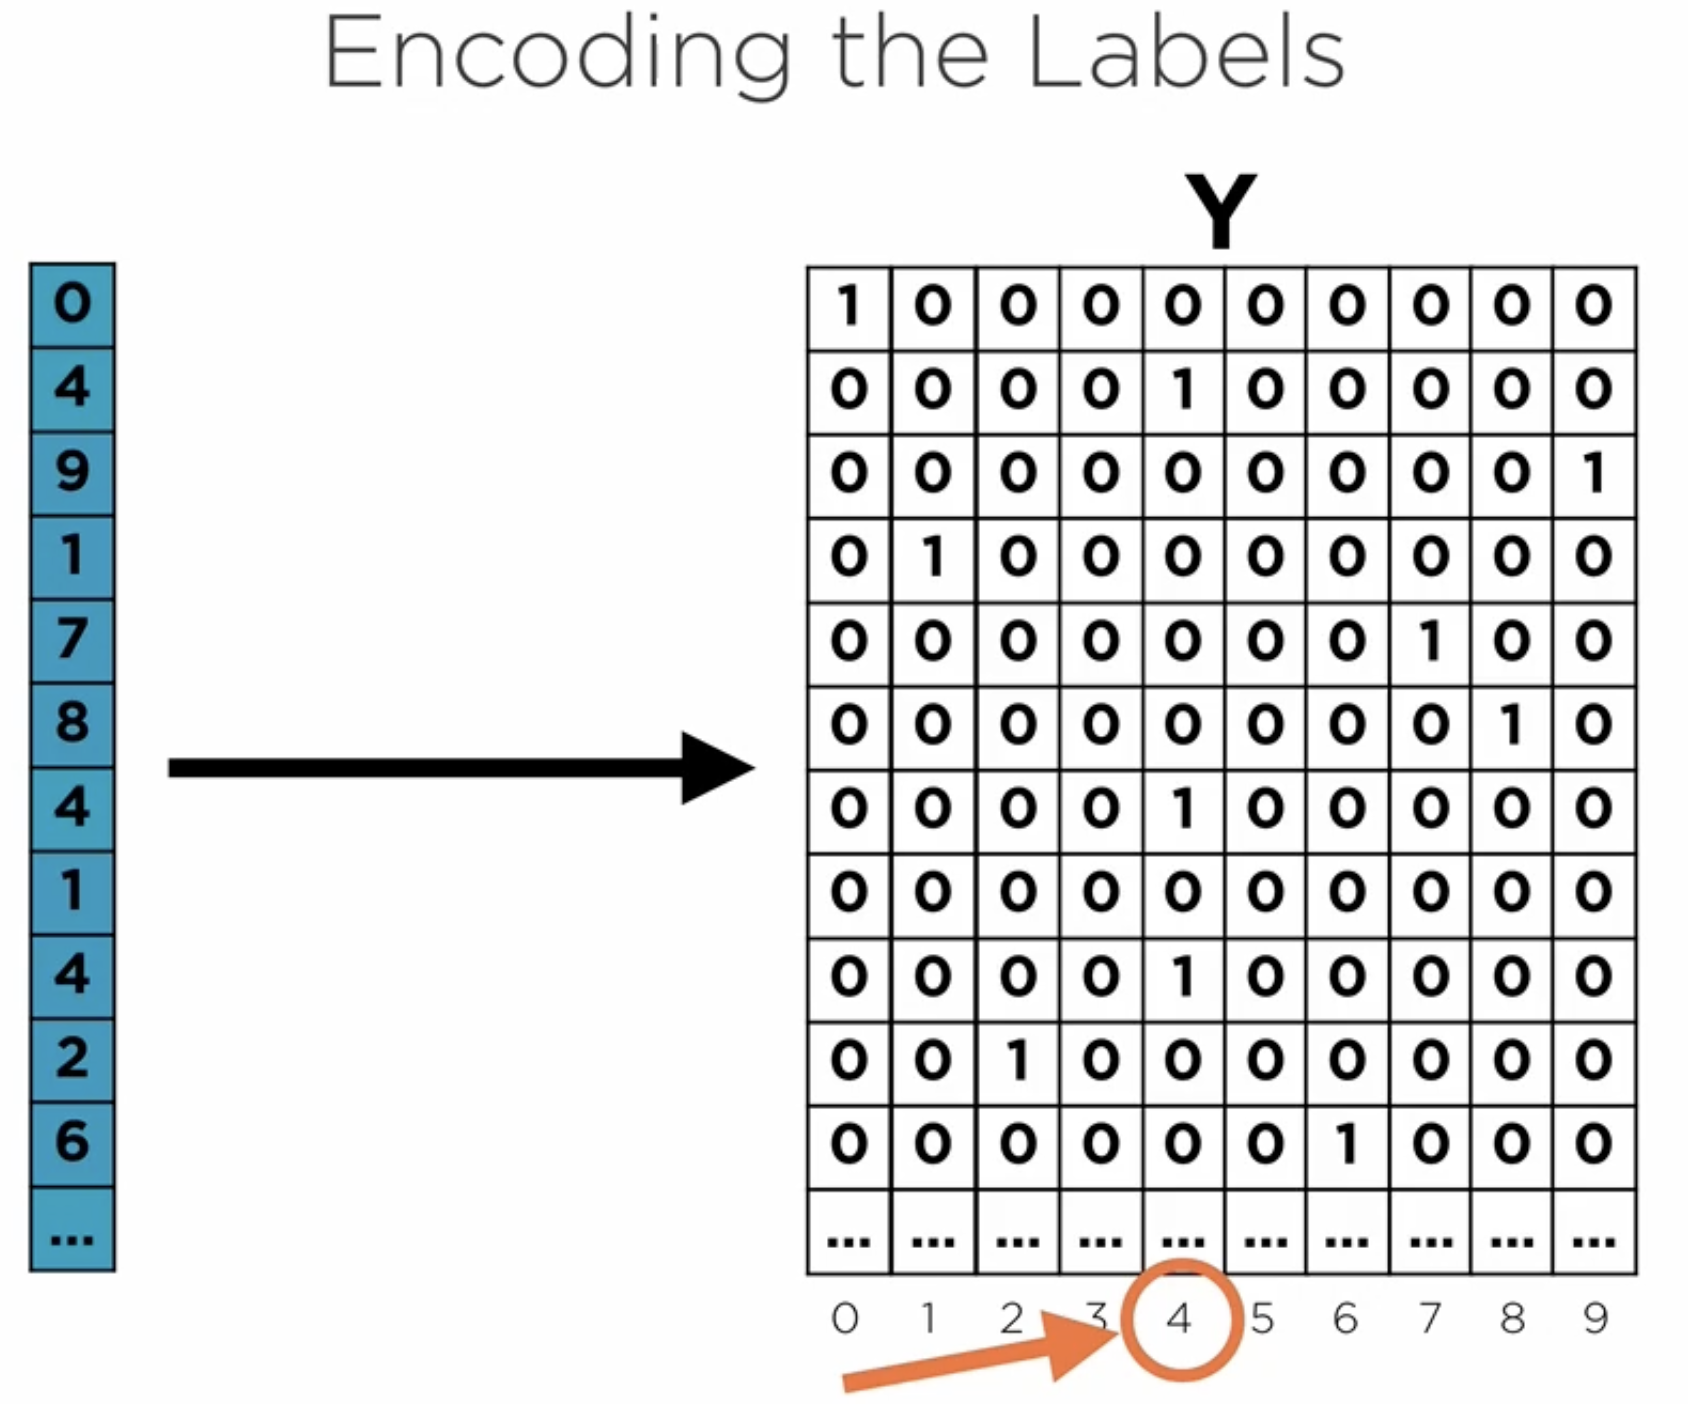

In [2]:
import numpy as np
import gzip
import struct

def load_images(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Read the header information into a bunch of variables:
        _ignored, n_images, image_columns, image_rows = struct.unpack('>IIII', f.read(16))
        # Read all the pixels into a long NumPy array:
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the array into a matrix where each line is an image:
        images_matrix = all_pixels.reshape(n_images, image_columns * image_rows)
        # Add a bias column full of 1s as the first column in the matrix
        return np.insert(images_matrix, 0, 1, axis=1)

In [3]:
# 60000 images, each 785 elements (1 bias + 28 * 28 pixels):
X_train = load_images("./mnist/train-images-idx3-ubyte.gz")

# 10000 images, each 785 elements, with the same structure as X_train:
X_test = load_images("./mnist/t10k-images-idx3-ubyte.gz")

In [4]:
def load_labels(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Skip the header bytes:
        f.read(8)
        # Read all the labels into a list:
        all_labels = f.read()
        # Reshape the list of labels into a one-column matrix:
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)

In [5]:
def one_hot_encode(Y):
    NUMBER_OF_CLASSES = 10        # One class per digit
    NUMBER_OF_LABELS = Y.shape[0] # One label for each row in Y
    
    # Prepare a matrix of zeros with as many rows as the rows in Y,
    # and as many columns as the number of classes:
    encoded_labels = np.zeros((NUMBER_OF_LABELS, NUMBER_OF_CLASSES))

    # For each row, flip the column that matches the label to 1:
    for row in range(NUMBER_OF_LABELS):
        label = Y[row]
        encoded_labels[row][label] = 1
        
    return encoded_labels

In [6]:
# 60K labels, each with value 1 if the digit is a five, and 0 otherwise:
original_labels = load_labels("./mnist/train-labels-idx1-ubyte.gz")
Y_train = one_hot_encode(original_labels)

# 10000 labels, with the same encoding as Y_train:
Y_test = load_labels("./mnist/t10k-labels-idx1-ubyte.gz")

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def predict(X, w):
    return sigmoid(np.matmul(X, w))

In [9]:
def classify(X, w):
    # Calculate predictions–a matrix with one row per
    # prediction, each row including ten "votes of
    # confidence" for the ten digits:
    predictions = predict(X, w)
    # For each row, pick the index of the highest
    # prediction:
    labels = np.argmax(predictions, axis=1)
    # Reshape the labels to be one column, and as many
    # rows as necessary:
    return labels.reshape(-1, 1)

In [10]:
def loss(X, Y, w):
    predictions = predict(X, w)
    first_term = Y * np.log(predictions)
    second_term = (1 - Y) * np.log(1 - predictions)
    return -np.average(first_term + second_term)

In [11]:
def gradient(X, Y, w):
    return np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

In [12]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], Y.shape[1]))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

In [13]:
w = train(X_train, Y_train, iterations=200, lr=0.00001)

Iteration    0 => Loss: 0.69314718055994539725
Iteration    1 => Loss: 0.84344568750833359694
Iteration    2 => Loss: 0.55120474889238757488
Iteration    3 => Loss: 0.29568700735936542801
Iteration    4 => Loss: 0.18985387657057092858
Iteration    5 => Loss: 0.17558289155266745829
Iteration    6 => Loss: 0.16748812729262180232
Iteration    7 => Loss: 0.16238752434202810560
Iteration    8 => Loss: 0.15652805689746651652
Iteration    9 => Loss: 0.15292692651055575515
Iteration   10 => Loss: 0.14834968500183898232
Iteration   11 => Loss: 0.14547390723537276247
Iteration   12 => Loss: 0.14187844781439437614
Iteration   13 => Loss: 0.13942565669684220397
Iteration   14 => Loss: 0.13659350910622258812
Iteration   15 => Loss: 0.13445875188347644613
Iteration   16 => Loss: 0.13220198232096094793
Iteration   17 => Loss: 0.13034634184193591433
Iteration   18 => Loss: 0.12851171137662320554
Iteration   19 => Loss: 0.12690683151500536940
Iteration   20 => Loss: 0.12537827753717956103
Iteration   2

In [14]:
# Compute classifications:
classifications = classify(X_test, w)
# Count the predictions that match the original labels:
matched_predictions = np.count_nonzero(classifications == Y_test)
# Calculate the % of matched predictions:
matches_percent = 100 * matched_predictions / Y_test.shape[0]

In [15]:
matches_percent

90.32